In [220]:
import math as m
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor

In [221]:
# objective function
def objective(x, noise=0.1):
    noise = np.random.normal(loc=0, scale=noise)
    return (x**2 * m.sin(5 * m.pi * x)**6.0) + noise

 Optima: x=0.900, y=0.776 


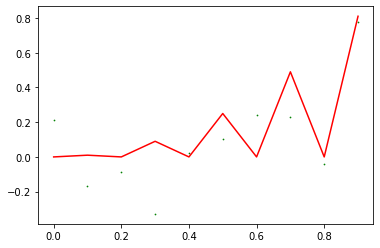

In [222]:
X = np.arange(0, 1, 0.1)
# sample the domain without noise
y = [objective(x, 0.15) for x in X]

plt.scatter(X,y, s=0.5, c='g')
plt.plot(X,[objective(x, 0) for x in X], c='r')

ix = np.argmax(y)
print( ' Optima: x=%.3f, y=%.3f ' % (X[ix], y[ix]))

In [223]:
# surrogate or approximation for the objective function
def surrogate(model, X):
# catch any warning generated when making a prediction
    with catch_warnings():
    # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [265]:
# plot real observations vs surrogate function
def plot_real_vs_surrogate(X, y, model):
    # scatter plot of inputs and real objective function
    plt.scatter(X, y,s=0.5, c='g')
    # line plot of surrogate function across domain
    Xsamples = np.asarray(np.arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, std = surrogate(model, Xsamples)
    #print(std)
    plt.scatter(Xsamples, ysamples, c='r',s=0.5)
    Xsamples = Xsamples.reshape(-1)
    ysamples = ysamples.reshape(-1)
    plt.fill_between(Xsamples, ysamples-std, ysamples+std, alpha=0.3)
    # show the plot
    plt.show()

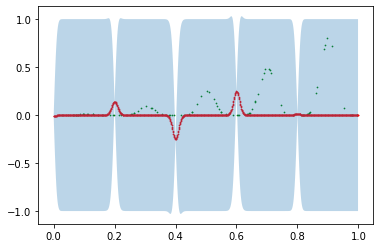

In [284]:
from sklearn.gaussian_process.kernels import RBF
model = GaussianProcessRegressor(kernel=RBF(length_scale=0.01))

X = np.arange(0, 1, 0.2)
y = [objective(x, 0.15) for x in X]

X = X.reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# fit the model
model.fit(X, y)
# plot the surrogate function
Xsamples = np.random.random(100).reshape(-1, 1)
y = [objective(x, 0) for x in Xsamples]

plot_real_vs_surrogate(Xsamples, y, model)

In [285]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
# random search, generate random samples
    Xsamples = np.random.random(100).reshape(-1, 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = np.argmax(scores)
    return Xsamples[ix, 0]

In [286]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

 >x=0.497, f()=0.496353, actual=0.206 


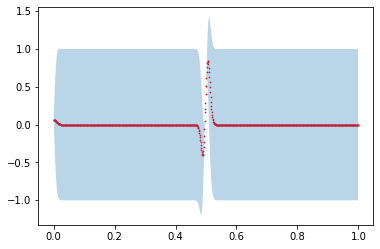

 >x=0.506, f()=0.842805, actual=0.479 
 >x=0.502, f()=0.625703, actual=0.321 
 >x=0.643, f()=0.000000, actual=-0.053 
 >x=0.912, f()=0.000000, actual=0.765 
 >x=0.692, f()=0.000000, actual=0.442 


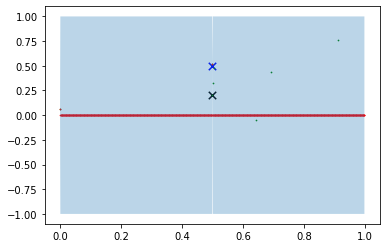

 >x=0.667, f()=0.000000, actual=0.356 
 >x=0.600, f()=0.000000, actual=0.067 
 >x=0.950, f()=0.000000, actual=0.156 
 >x=0.245, f()=0.000000, actual=-0.000 
 >x=0.506, f()=0.056454, actual=0.329 


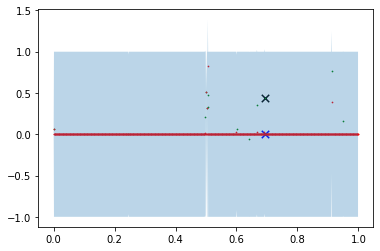

 >x=0.949, f()=0.000004, actual=0.154 
 >x=0.505, f()=0.000000, actual=0.314 
 >x=0.499, f()=0.000000, actual=0.244 
 >x=0.693, f()=0.000010, actual=0.489 
 >x=0.667, f()=0.006850, actual=0.101 


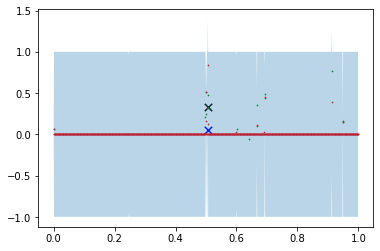

 >x=0.499, f()=0.038543, actual=0.256 
 >x=0.505, f()=0.134742, actual=0.085 
 >x=0.699, f()=0.000000, actual=0.478 
 >x=0.500, f()=0.377757, actual=0.425 
 >x=0.506, f()=1.300092, actual=0.055 


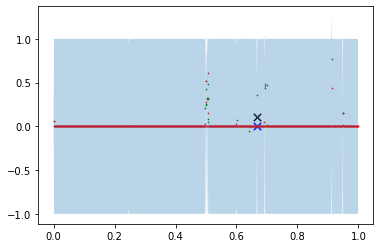

 >x=0.500, f()=0.079484, actual=0.160 
 >x=0.913, f()=0.000000, actual=0.796 
 >x=0.913, f()=0.195259, actual=0.942 
 >x=0.699, f()=0.002039, actual=0.638 
 >x=0.600, f()=0.003121, actual=0.056 


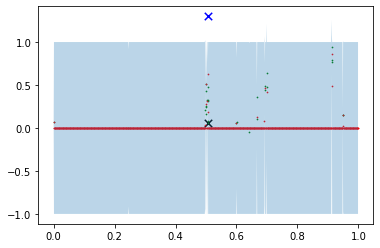

 >x=0.666, f()=0.000000, actual=0.207 
 >x=0.498, f()=0.002407, actual=0.230 
 >x=0.668, f()=0.000046, actual=0.162 
 >x=0.001, f()=0.000002, actual=0.108 
 >x=0.502, f()=0.022069, actual=0.286 


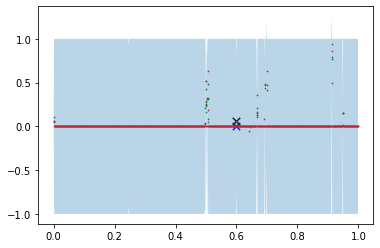

 >x=0.911, f()=0.000019, actual=0.858 
 >x=0.912, f()=0.557658, actual=0.826 
 >x=0.700, f()=0.049118, actual=0.407 
 >x=0.700, f()=0.235185, actual=0.362 
 >x=0.666, f()=0.063137, actual=0.097 


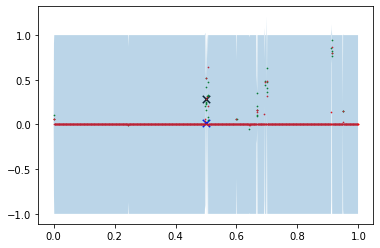

 >x=0.498, f()=0.023280, actual=0.404 
 >x=0.694, f()=0.000000, actual=0.560 
 >x=0.695, f()=0.468417, actual=0.549 
 >x=0.948, f()=0.000225, actual=0.166 
 >x=0.915, f()=0.000000, actual=0.783 


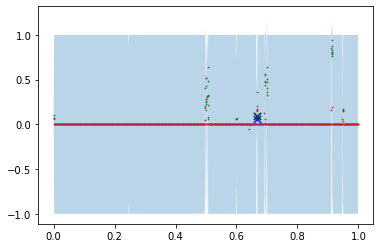

 >x=0.501, f()=0.069744, actual=0.103 
 >x=0.697, f()=0.000000, actual=0.639 
 >x=0.914, f()=0.222569, actual=0.630 
 >x=0.500, f()=0.279456, actual=0.245 
 >x=0.913, f()=0.949003, actual=0.897 


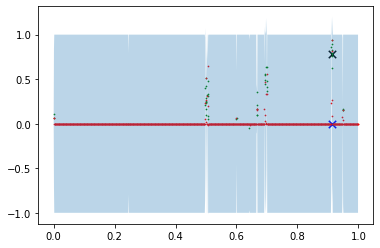

 >x=0.248, f()=-0.000000, actual=0.133 
 >x=0.598, f()=0.000000, actual=0.024 
 >x=0.601, f()=0.000000, actual=-0.106 
 >x=0.698, f()=0.102109, actual=0.530 
 >x=0.911, f()=0.003406, actual=0.759 


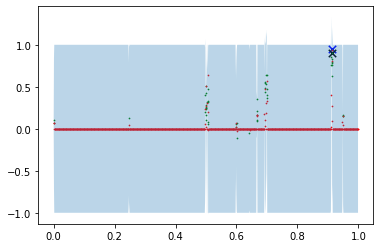

 >x=0.912, f()=0.259202, actual=0.846 
 >x=0.692, f()=0.011081, actual=0.542 
 >x=0.911, f()=0.689029, actual=0.606 
 >x=0.947, f()=0.000000, actual=0.115 
 >x=0.693, f()=0.368716, actual=0.503 


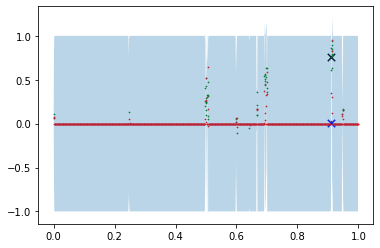

 >x=0.913, f()=0.865806, actual=0.796 
 >x=0.698, f()=0.081283, actual=0.451 
 >x=0.502, f()=0.124929, actual=0.431 
 >x=0.915, f()=0.534902, actual=0.783 
 >x=0.664, f()=0.000000, actual=0.137 


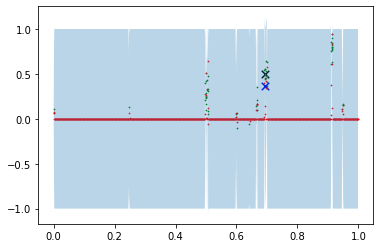

 >x=0.911, f()=0.522492, actual=0.497 
 >x=0.214, f()=0.000000, actual=-0.044 
 >x=0.503, f()=0.000077, actual=0.157 
 >x=0.336, f()=0.000000, actual=0.054 
 >x=0.912, f()=0.887658, actual=0.750 


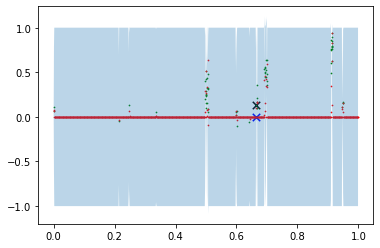

 >x=0.247, f()=0.000132, actual=-0.035 
 >x=0.597, f()=0.000000, actual=0.086 
 >x=0.250, f()=0.000000, actual=0.070 
 >x=0.663, f()=0.002974, actual=0.310 
 >x=0.695, f()=0.007875, actual=0.248 


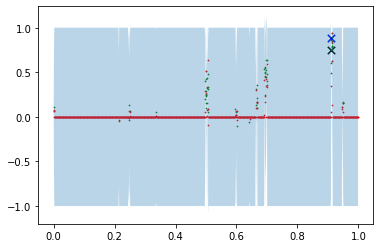

 >x=0.251, f()=0.005870, actual=0.008 
 >x=0.914, f()=0.419882, actual=0.530 
 >x=0.249, f()=0.001221, actual=-0.038 
 >x=0.915, f()=0.058307, actual=0.692 
 >x=0.696, f()=0.001731, actual=0.689 


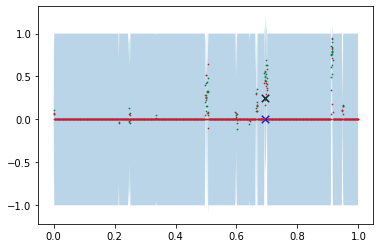

 >x=0.914, f()=0.175193, actual=0.540 
 >x=0.910, f()=0.147603, actual=0.839 
 >x=0.697, f()=0.298507, actual=0.577 
 >x=0.690, f()=0.000000, actual=0.395 
 >x=0.001, f()=0.009597, actual=-0.064 


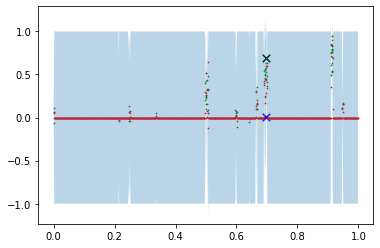

 >x=0.948, f()=0.029681, actual=0.043 
 >x=0.599, f()=0.000836, actual=-0.028 
 >x=0.496, f()=0.000152, actual=0.246 
 >x=0.913, f()=0.944900, actual=0.782 
 >x=0.596, f()=0.000176, actual=-0.085 


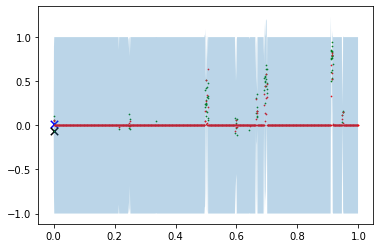

 >x=0.696, f()=0.442006, actual=0.308 
 >x=0.910, f()=0.110678, actual=0.812 
 >x=0.915, f()=0.430595, actual=0.592 
 >x=0.909, f()=0.028713, actual=0.662 
 >x=0.697, f()=0.539712, actual=0.372 


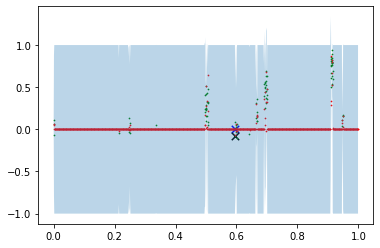

 >x=0.950, f()=0.002307, actual=0.138 
 >x=0.667, f()=0.230381, actual=0.336 
 >x=0.691, f()=0.267734, actual=0.330 
 >x=0.696, f()=0.024749, actual=0.622 
 >x=0.248, f()=0.010036, actual=-0.159 


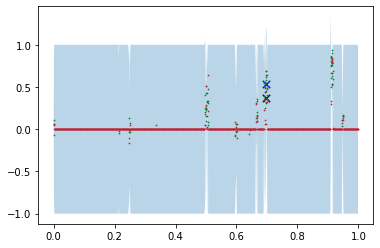

 >x=0.693, f()=0.250985, actual=0.484 
 >x=0.699, f()=0.418918, actual=0.428 
 >x=0.910, f()=0.864602, actual=0.790 
 >x=0.697, f()=0.664309, actual=0.383 
 >x=0.912, f()=0.855270, actual=0.653 


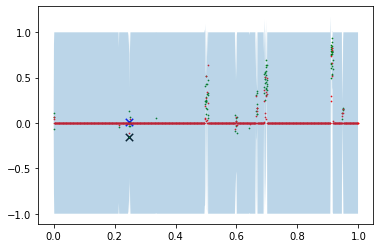

 >x=0.912, f()=0.827919, actual=0.860 
 >x=0.669, f()=0.000000, actual=0.307 
 >x=0.945, f()=0.000000, actual=-0.095 
 >x=0.267, f()=0.000000, actual=0.123 
 >x=0.664, f()=0.005129, actual=0.123 


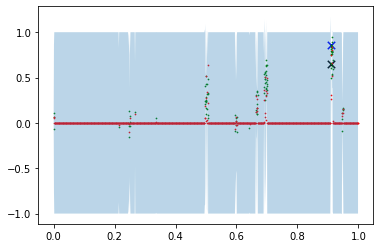

 >x=0.691, f()=0.000268, actual=0.559 
 >x=0.910, f()=0.703814, actual=0.783 
 >x=0.695, f()=0.204104, actual=0.551 
 >x=0.909, f()=0.721161, actual=0.913 
 >x=0.338, f()=0.000000, actual=0.064 


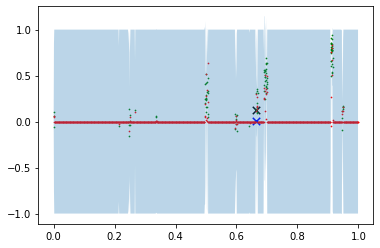

 >x=0.690, f()=0.137894, actual=0.410 
 >x=0.949, f()=0.066447, actual=0.046 
 >x=0.335, f()=0.000000, actual=0.069 
 >x=0.662, f()=0.000000, actual=0.242 
 >x=0.699, f()=0.562749, actual=0.314 


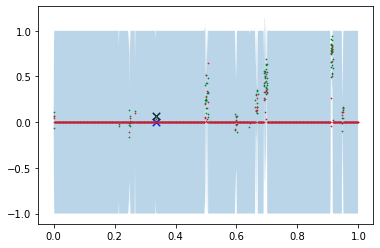

 >x=0.913, f()=0.956064, actual=0.710 
 >x=0.914, f()=0.462146, actual=0.735 
 >x=0.501, f()=0.004328, actual=0.326 
 >x=0.597, f()=0.011492, actual=0.065 
 >x=0.916, f()=0.055212, actual=0.797 


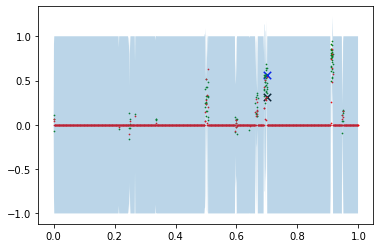

 >x=0.698, f()=0.318750, actual=0.477 
 >x=0.663, f()=0.048175, actual=0.139 
 >x=0.268, f()=0.001091, actual=0.173 
 >x=0.665, f()=0.001231, actual=0.229 
 >x=0.915, f()=0.675452, actual=0.575 


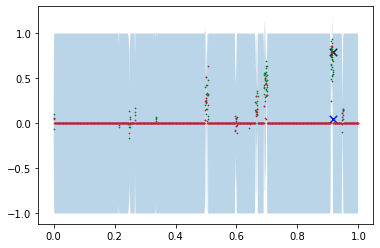

 >x=0.497, f()=0.012893, actual=0.354 
 >x=0.913, f()=0.950420, actual=0.811 
 >x=0.909, f()=0.082277, actual=0.620 
 >x=0.661, f()=0.000476, actual=0.175 
 >x=0.909, f()=0.914063, actual=0.792 


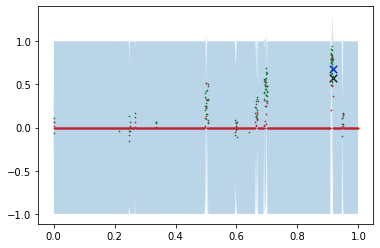

 >x=0.914, f()=0.144346, actual=0.771 
 >x=0.669, f()=0.007424, actual=0.220 
 >x=0.909, f()=0.004802, actual=0.894 
 >x=0.699, f()=0.280581, actual=0.549 
 >x=0.690, f()=0.004716, actual=0.377 


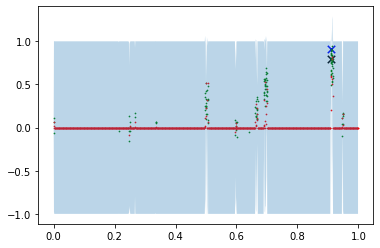

 >x=0.690, f()=0.293728, actual=0.542 
 >x=0.502, f()=0.281698, actual=0.299 
 >x=0.599, f()=0.000071, actual=-0.057 
 >x=0.668, f()=0.001584, actual=0.247 
 >x=0.506, f()=0.727079, actual=0.211 


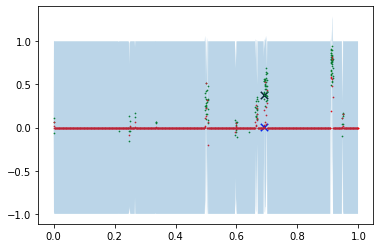

 >x=0.334, f()=0.000000, actual=0.054 
 >x=0.911, f()=0.727942, actual=0.735 
 >x=0.505, f()=0.000006, actual=0.266 
 >x=0.910, f()=0.894246, actual=0.893 
 >x=0.663, f()=0.096607, actual=0.135 


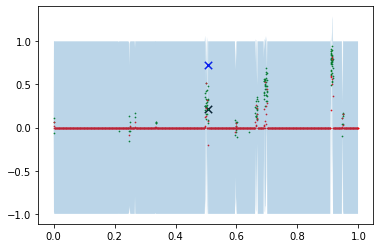

 >x=0.947, f()=0.006139, actual=0.148 
 >x=0.949, f()=0.027027, actual=0.197 
 >x=0.698, f()=0.249577, actual=0.556 
 >x=0.498, f()=0.144583, actual=0.141 


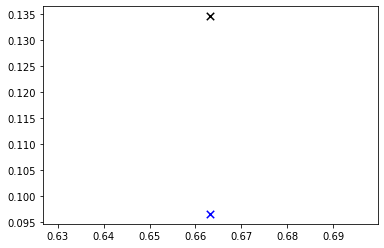

In [287]:
# perform the optimization process

X = np.arange(0, 1, 0.5)
y = [objective(x, 0.15) for x in X]
X = X.reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
# fit the model
model.fit(X, y)

for i in range(150):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding for our own reporting
    est, _ = surrogate(model, [[x]])
    print( ' >x=%.3f, f()=%3f, actual=%.3f ' % (x, est, actual))
    # add the data to the dataset
    X = np.vstack((X, [[x]]))
    y = np.vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)
    if i%5==0:
        plot_real_vs_surrogate(X, y, model)
        plt.scatter(x, est, s=55, c='b', marker='x')
        plt.scatter(x, actual, s=55, c='k', marker='x')